In [17]:
pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

# Acquire the MBTI Personality Dataset using your Kaggle Key

In [2]:
from google.colab import files
files.upload() # UPLOAD KAGGLE KEY

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaanshthakur","key":"89ebf0463f96d62b5d067e776b3aefbe"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                            title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                              Chocolate Sales Data 📊🍫                                14473  2025-03-19 03:51:40.270000          18771        314  1.0              
adilshamim8/student-depression-dataset                         Student Depression Dataset                            467020  2025-03-13 03:12:30.423000           9723        140  1.0              
atharvasoundankar/impact-of-ai-on-digital-media-2020-2025      🌍 Impact of AI on Digital Media (2020-2025)             5812  2025-04-03 09:12:25.070000           1087         27  1.0              
ertugrulesol/on

In [6]:
!kaggle datasets download -d datasnaek/mbti-type

Dataset URL: https://www.kaggle.com/datasets/datasnaek/mbti-type
License(s): CC0-1.0


In [7]:
! unzip "mbti-type.zip"

Archive:  mbti-type.zip
  inflating: mbti_1.csv              


In [8]:
import pandas as pd

df = pd.read_csv("mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [9]:
df["type"] = df["type"].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   type    8675 non-null   category
 1   posts   8675 non-null   object  
dtypes: category(1), object(1)
memory usage: 77.0+ KB


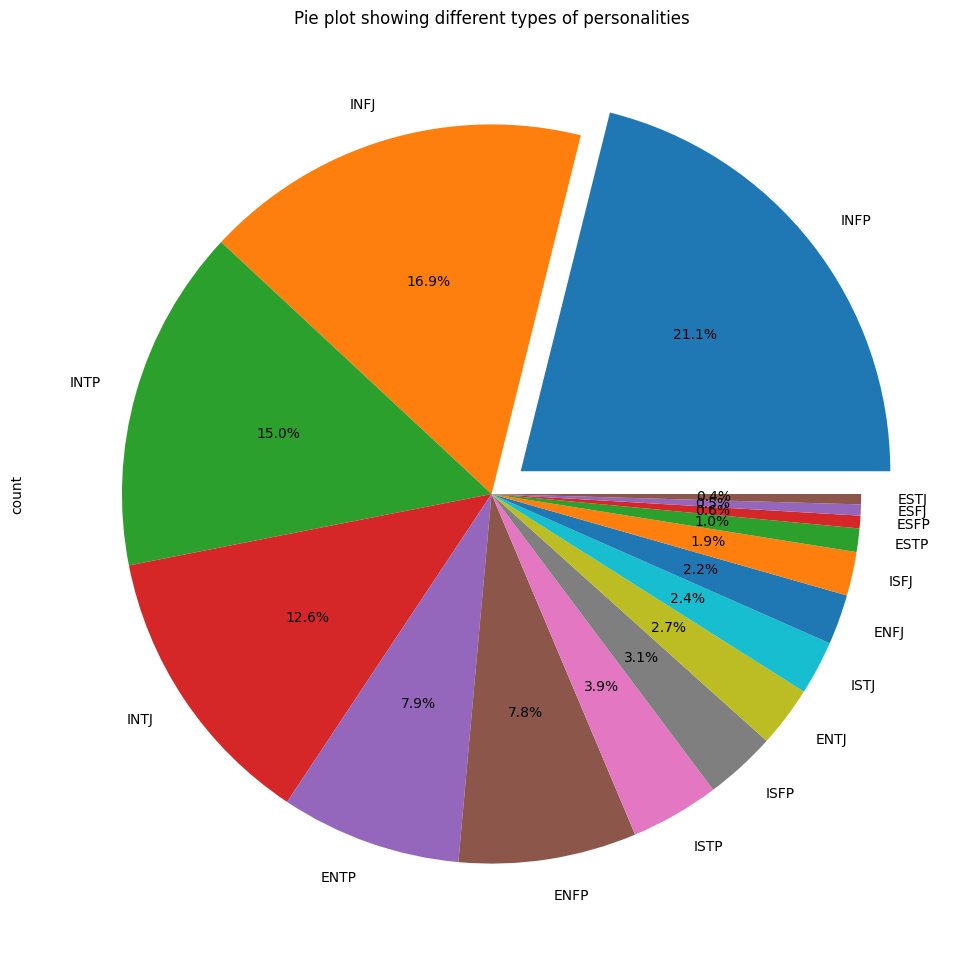

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df.type.value_counts().plot(kind='pie',figsize=(12,12), autopct='%1.1f%%', explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Pie plot showing different types of personalities')
plt.show()

In [12]:
import re

def clean_for_bert(text):
    text = re.sub(r"http\S+", "", text)           # remove URLs
    text = re.sub(r"www\S+", "", text)            # remove URLs
    text = re.sub(r"@\w+", "", text)              # remove @mentions
    text = re.sub(r"\s+", " ", text).strip()      # normalize whitespace
    return text

df['posts'] = df['posts'].apply(clean_for_bert)

In [13]:
df

,type,posts
0,INFJ,' and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,"'Good one _____ course, to which I say I know;..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the oth..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,' just because I always think of cats as Fi do...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I w...
8673,INFP,'I am very conflicted right now when it comes ...


In [14]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Example: num_labels = 16 (for 16 MBTI types)
num_labels = 16

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["type"])

In [18]:
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True, padding=True, max_length=128)

# Assuming you have a pandas DataFrame
from datasets import Dataset

dataset = Dataset.from_pandas(df[['posts', 'label']])
dataset = dataset.rename_column("posts", "text")
dataset = dataset.rename_column("label", "labels")

dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/8675 [00:00<?, ? examples/s]

In [19]:
dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [20]:
dataset

Dataset({
    features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8675
})

In [22]:
train_test = dataset.train_test_split(test_size=0.2)
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_test["train"],
    eval_dataset=train_test["test"],
    tokenizer=tokenizer
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-22-1354762c2580>:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,2.023168
2,2.195900,1.944007
3,1.842900,1.984672


TrainOutput(global_step=1302, training_loss=1.916765391735071, metrics={'train_runtime': 534.086, 'train_samples_per_second': 38.982, 'train_steps_per_second': 2.438, 'total_flos': 1369665188904960.0, 'train_loss': 1.916765391735071, 'epoch': 3.0})

In [23]:
trainer.evaluate()

{'eval_loss': 1.98467218875885,
 'eval_runtime': 12.3316,
 'eval_samples_per_second': 140.696,
 'eval_steps_per_second': 8.839,
 'epoch': 3.0}

---
# Testing the Model for Class Collapse

In [34]:
import torch
texts = [
    "I love staying home and reflecting on my thoughts.",
    "I enjoy leading group projects and debating ideas.",
    "I prefer facts and logic over emotions.",
    "Spontaneity excites me more than routine.",
    "I like helping others and making people feel included.",
    "I need time alone to recharge.",
    "I plan everything in advance and hate surprises.",
]

def predict_mbti(texts):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=512,  # or 128
        return_tensors="pt"
    ).to(device)  # move inputs to the same device

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

    return preds.cpu().numpy()

y = predict_mbti(texts)


In [35]:
decoded = le.inverse_transform(y)
print(decoded)

['INFP' 'INTJ' 'INTP' 'INTP' 'INFP' 'INFP' 'ISTP']


---
# Downloading Model, Encoder and Vectorizer

In [36]:
model.save_pretrained("model")

In [37]:
tokenizer.save_pretrained("tokenizer")


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json')

In [39]:
import pickle

with open("target_encoder.pkl", "wb") as f:
    pickle.dump(le, f)